## Lab 15 Eliminate Small Objects

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from numpy import random

In [13]:
!wget https://assets.gezdev.com/dip/AAA.bmp

--2021-09-21 15:35:36--  https://assets.gezdev.com/dip/AAA.bmp
Resolving assets.gezdev.com (assets.gezdev.com)... 157.230.39.189
Connecting to assets.gezdev.com (assets.gezdev.com)|157.230.39.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2359350 (2.2M) [image/x-ms-bmp]
Saving to: 'AAA.bmp.2'

     0K .......... .......... .......... .......... ..........  2% 1.11M 2s
    50K .......... .......... .......... .......... ..........  4% 1.07M 2s
   100K .......... .......... .......... .......... ..........  6%  103M 1s
   150K .......... .......... .......... .......... ..........  8% 1.06M 1s
   200K .......... .......... .......... .......... .......... 10% 1.09M 1s
   250K .......... .......... .......... .......... .......... 13% 1.06M 2s
   300K .......... .......... .......... .......... .......... 15% 1.11M 2s
   350K .......... .......... .......... .......... .......... 17% 1.09M 2s
   400K .......... .......... .......... .......... .......... 19%

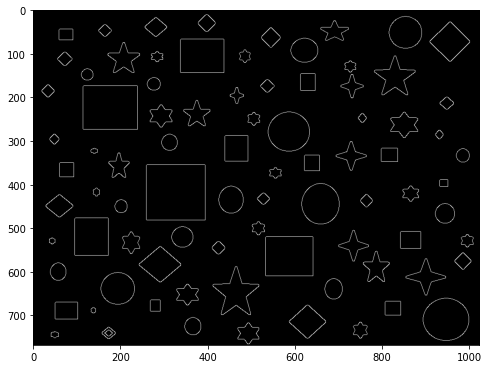

In [14]:
src = cv.imread("./AAA.bmp")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY)
canny_image = cv.Canny(gray_img, 50, 150)
plt.rcParams["figure.figsize"] = [8, 8]
plt.imshow(canny_image,cmap='gray')
plt.show()

All Object => 26


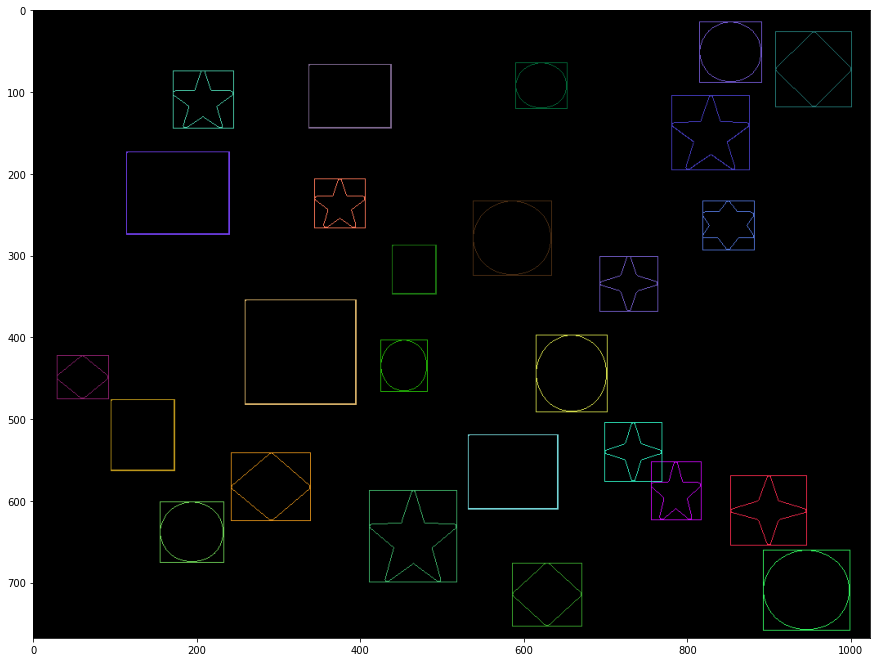

In [30]:
from numpy import random
contours, hierarchy = cv.findContours(canny_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
edge_img = canny_image.copy()
drawn_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) # สร้างภาพเปล่าๆ ขึ้นมาเพื่อวาด Contourที่เราหาได้
drawn_contour_img = cv.cvtColor(drawn_contour_img,cv.COLOR_GRAY2RGB)
num=0
for i,value in enumerate(contours):
    x,y,w,h = cv.boundingRect(contours[i])
    if (w*h>2999) :
        num = num+1
        c = random.randint(255, size=(3))
        color = (c[0].item(),c[1].item(),c[2].item())
        cv.drawContours(drawn_contour_img, contours, i, color, 1)
        cv.rectangle(drawn_contour_img,(x,y),(x+w,y+h),color,1)
plt.rcParams["figure.figsize"] = [15, 15] 
plt.imshow(drawn_contour_img)
print(f"All Object => {num}")
plt.show()
